In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\Cyborg\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [90]:
train=pd.read_csv(r"C:\Users\Cyborg\Music\train.csv")
test=pd.read_csv(r"C:\Users\Cyborg\Downloads\test_QyjYwdj.csv")
campaign_data=pd.read_csv(r"C:\Users\Cyborg\Music\campaign_data.csv")
coupon_data=pd.read_csv(r"C:\Users\Cyborg\Music\coupon_item_mapping.csv")
customer_demographics=pd.read_csv(r"C:\Users\Cyborg\Music\customer_demographics.csv")
customer_transaction=pd.read_csv(r"C:\Users\Cyborg\Music\customer_transaction_data.csv")
item_data=pd.read_csv(r"C:\Users\Cyborg\Music\item_data.csv")
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [91]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [92]:
train['campaign_type']=train['campaign_id'].map(campaign_data['campaign_type'])
train['campaign_start_date']=train['campaign_id'].map(campaign_data['start_date'])
train['campaign_end_date']=train['campaign_id'].map(campaign_data['end_date'])
train['age_range']=train['customer_id'].map(customer_demographics['age_range'])
train['marital_status']=train['customer_id'].map(customer_demographics['marital_status'])
train['rented']=train['customer_id'].map(customer_demographics['rented'])
train['family_size']=train['customer_id'].map(customer_demographics['family_size'])
train['no_of_children']=train['customer_id'].map(customer_demographics['no_of_children'])
train['income_bracket']=train['customer_id'].map(customer_demographics['income_bracket'])
train['item_id']=train['coupon_id'].map(coupon_data['item_id'])
train['brand']=train['item_id'].map(item_data['brand'])
train['brand_type']=train['item_id'].map(item_data['brand_type'])
train['brand_category']=train['item_id'].map(item_data['category'])



In [93]:
test['campaign_type']=train['campaign_id'].map(campaign_data['campaign_type'])
# train['campaign_start_date']=train['campaign_id'].map(campaign_data['start_date'])
# train['campaign_end_date']=train['campaign_id'].map(campaign_data['end_date'])
test['age_range']=test['customer_id'].map(customer_demographics['age_range'])
test['marital_status']=test['customer_id'].map(customer_demographics['marital_status'])
test['rented']=test['customer_id'].map(customer_demographics['rented'])
test['family_size']=test['customer_id'].map(customer_demographics['family_size'])
test['no_of_children']=test['customer_id'].map(customer_demographics['no_of_children'])
test['income_bracket']=test['customer_id'].map(customer_demographics['income_bracket'])
test['item_id']=test['coupon_id'].map(coupon_data['item_id'])
test['brand']=test['item_id'].map(item_data['brand'])
test['brand_type']=test['item_id'].map(item_data['brand_type'])
test['brand_category']=test['item_id'].map(item_data['category'])



In [94]:
cat_df_flights = df.select_dtypes(include=['object']).copy()

In [95]:
cat_df_flights.head()

,campaign_type,age_range,marital_status,family_size,no_of_children,brand_type,brand_category
0,Y,56-70,Married,2,0,Local,Grocery
1,Y,46-55,Married,2,0,Established,Pharmaceutical
2,Y,70+,Married,2,0,Established,Grocery
3,Y,56-70,Married,2,0,Local,Grocery
4,Y,56-70,Married,2,0,Established,Grocery


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 18 columns):
id                     78369 non-null int64
campaign_id            78369 non-null int64
coupon_id              78369 non-null int64
customer_id            78369 non-null int64
redemption_status      78369 non-null int64
campaign_type          67531 non-null object
campaign_start_date    67531 non-null object
campaign_end_date      67531 non-null object
age_range              38412 non-null object
marital_status         22731 non-null object
rented                 38412 non-null float64
family_size            38412 non-null object
no_of_children         10779 non-null object
income_bracket         38412 non-null float64
item_id                78369 non-null int64
brand                  78369 non-null int64
brand_type             78369 non-null object
brand_category         78369 non-null object
dtypes: float64(2), int64(7), object(9)
memory usage: 10.8+ MB


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 15 columns):
id                50226 non-null int64
campaign_id       50226 non-null int64
coupon_id         50226 non-null int64
customer_id       50226 non-null int64
campaign_type     43284 non-null object
age_range         23177 non-null object
marital_status    13821 non-null object
rented            23177 non-null float64
family_size       23177 non-null object
no_of_children    7304 non-null object
income_bracket    23177 non-null float64
item_id           50226 non-null int64
brand             50226 non-null int64
brand_type        50226 non-null object
brand_category    50226 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 5.7+ MB


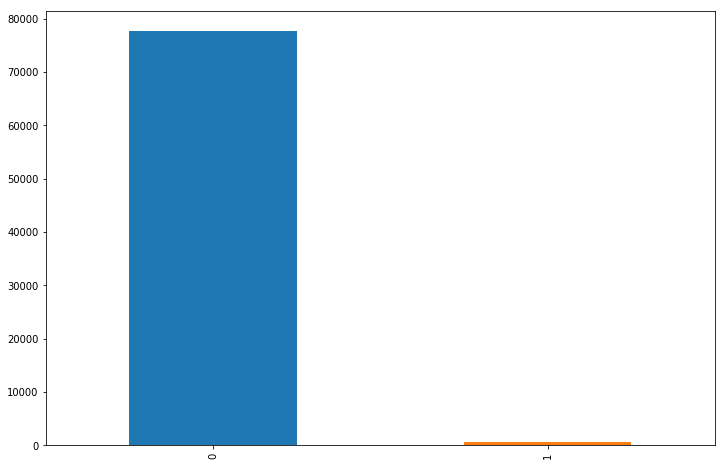

In [98]:
train['redemption_status'].value_counts().plot.bar()

C:\Users\Cyborg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


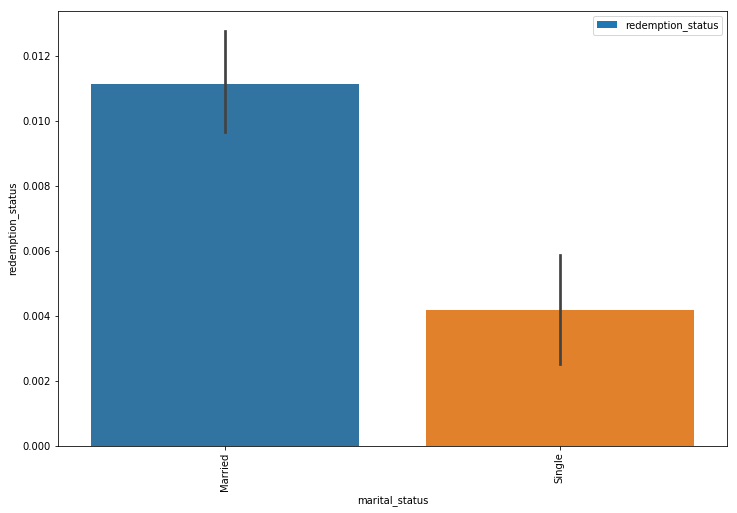

In [99]:
train[['marital_status','redemption_status']].groupby('marital_status').mean().plot.bar()
sns.barplot('marital_status', 'redemption_status', data = train)
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


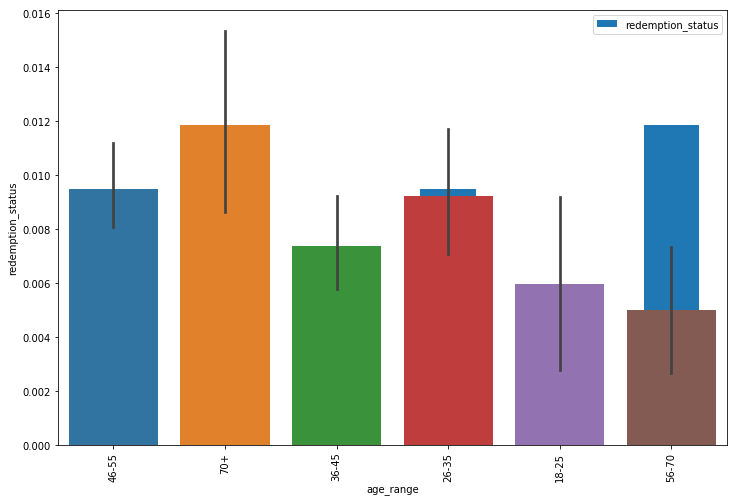

In [100]:
train[['age_range','redemption_status']].groupby('age_range').mean().plot.bar()
sns.barplot('age_range', 'redemption_status', data = train)
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


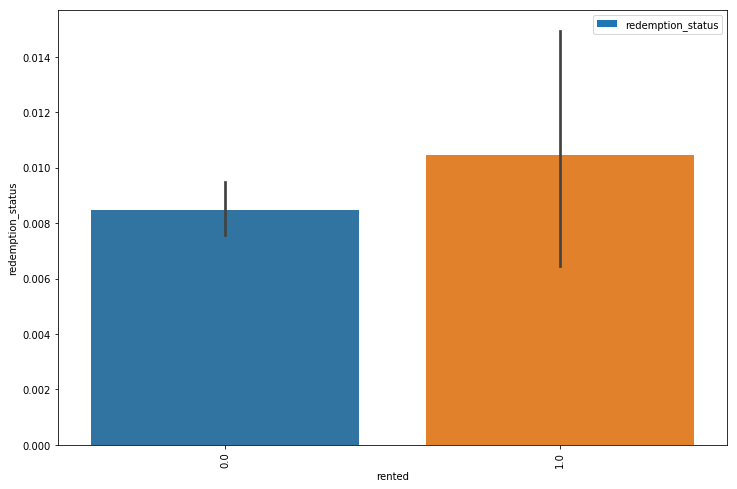

In [101]:
train[['rented','redemption_status']].groupby('rented').mean().plot.bar()
sns.barplot('rented', 'redemption_status', data = train)
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


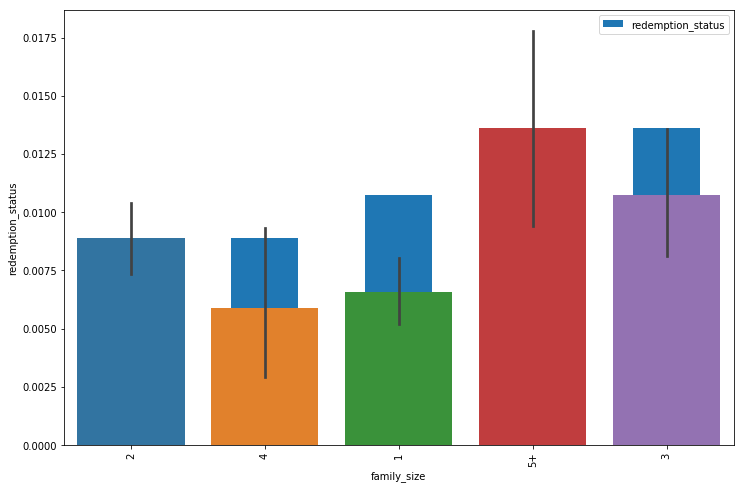

In [102]:
train[['family_size','redemption_status']].groupby('family_size').mean().plot.bar()
sns.barplot('family_size', 'redemption_status', data = train)
plt.show()

In [103]:
df=train.copy()
# # df.DateTime=pd.to_datetime(df.campaign_start_date)
# df['date']=df.campaign_start_date.dt.day
# df['hour']=df.campaign_start_date.dt.hour
# df['minute']=df.campaign_start_date.dt.minute
df.drop('campaign_start_date',axis=1,inplace=True)
df.drop('campaign_end_date',axis=1,inplace=True)

In [104]:
df.campaign_id=df.campaign_id.astype(np.object)
df.coupon_id=df.coupon_id.astype(np.object)
df.customer_id=df.customer_id.astype(np.object)
df.item_id=df.item_id.astype(np.object)

In [105]:
# df.user_group_id.fillna(13.0,inplace=True)
# df.age_range.fillna(7.0,inplace=True)
# df.user_depth.fillna(4.0,inplace=True)
# df.city_development_index.fillna(5.0,inplace=True)
# df['agelevel_userdepth']=df.age_level*df.user_depth

In [106]:
len(df['brand'].unique())

254

In [107]:
df['age_range']=df['age_range'].fillna('56-70')
df['marital_status']=df['marital_status'].fillna("Married")
df['campaign_type']=df['campaign_type'].fillna("Y")
df['rented']=df['rented'].fillna(0.0)
df['family_size']=df['family_size'].fillna(2)
df['no_of_children']=df['no_of_children'].fillna(0)
df['income_bracket']=df['income_bracket'].fillna(5.0)
df['brand_type']=df['brand_type'].fillna('Established')

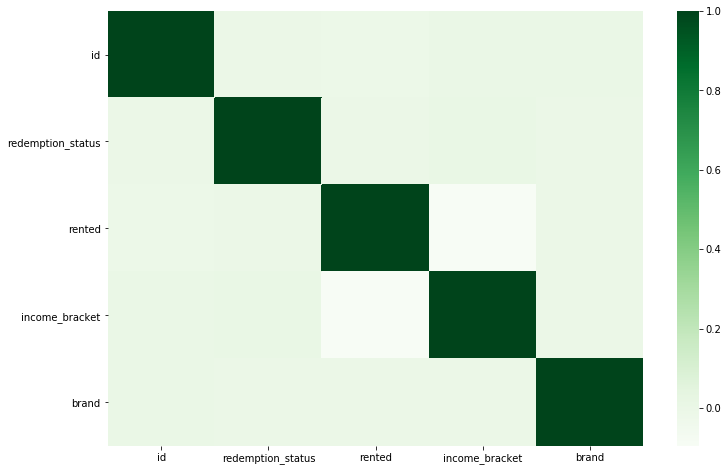

In [108]:
sns.heatmap(df.corr(),cmap='Greens')

In [109]:
df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket', 'item_id', 'brand', 'brand_type',
       'brand_category'],
      dtype='object')

In [110]:
cat_cols = ['id','campaign_id' ,'customer_id', 'coupon_id', 'campaign_type', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', \
            'income_bracket', 'brand', 'brand_type']
int_cols = [col for col in train.columns if col not in cat_cols]

In [111]:
print('Missing data in train:',df.columns[df.isnull().any(axis=0)])
print('Missing data in test:',test.columns[test.isnull().any(axis=0)])

Missing data in train: Index([], dtype='object')
Missing data in test: Index(['campaign_type', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')


In [112]:
df=df.drop(['campaign_id', 'coupon_id', 'item_id', 'customer_id'], axis=1)

In [113]:
test=test.drop(['campaign_id', 'coupon_id', 'item_id', 'customer_id'], axis=1)

In [114]:
y=df['redemption_status']

In [115]:
df=df.drop("redemption_status", axis=1)
x=df

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [117]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 52507 and each image is of shape (11)
Number of training examples : 25862 and each image is of shape (11)


In [122]:
output_dim = 1
input_dim = x_train.shape[1]

batch_size = 128 
nb_epoch = 20
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [123]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping


# define roc_callback, inspired by https://github.com/keras-team/keras/issues/6050#issuecomment-329996505
def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value


In [120]:
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [127]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auc_roc])

In [128]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [129]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 52507 samples, validate on 25862 samples
Epoch 1/20


ValueError: could not convert string to float: 'Y'

In [132]:
type(y_train[0])

numpy.int64